In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### Data Preparation

In [6]:
files  = [file for file in os.listdir('C:/Users/OMKAR/Documents/PortFolio/E-commerce-site-Sales-data-Analysis/Sales_Data-20230416T071954Z-001/Sales_Data')]
for file in files:
    print(file)

all_data.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [7]:
path = 'C:/Users/OMKAR/Documents/PortFolio/E-commerce-site-Sales-data-Analysis/Sales_Data-20230416T071954Z-001/Sales_Data'
all_data = pd.DataFrame()

for file in files:
    current_df = pd.read_csv(path+'/'+file)
    all_data = pd.concat([all_data,current_df])
    
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [9]:
all_data.shape

(373700, 6)

In [10]:
all_data.to_csv('C:/Users/OMKAR/Documents/PortFolio/E-commerce-site-Sales-data-Analysis/final_sales.csv')

#### Dropping null values

In [14]:
all_data.isnull().sum()

Order ID            1090
Product             1090
Quantity Ordered    1090
Price Each          1090
Order Date          1090
Purchase Address    1090
dtype: int64

In [15]:
df = all_data.dropna(how = 'all')
df.shape

(372610, 6)

In [16]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Best month for sales

In [18]:
def month(x):
    return x.split('/')[0]

In [19]:
df['month'] = df['Order Date'].apply(month)

C:\Users\OMKAR\AppData\Local\Temp/ipykernel_7112/2980327951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['Order Date'].apply(month)


In [21]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [22]:
df['month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [24]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month               object
dtype: object

### Changing data type of required field

In [44]:
df['month'].astype(int)

0        4
2        4
3        4
4        4
5        4
        ..
11681    9
11682    9
11683    9
11684    9
11685    9
Name: month, Length: 371900, dtype: int32

In [28]:
filter = df['month']=='Order Date'
df = df[~filter]

In [29]:
df['month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [38]:
df['month'] = df['month'].astype(int)

In [31]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'month'],
      dtype='object')

In [43]:
 df['Quantity Ordered'].unique()

array([2, 1, 3, 5, 4, 7, 6, 8, 9])

In [33]:
df['Price Each'].unique()

array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
       '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
       '999.99', '400', '379.99', '700.0', '1700.0', '150.0', '300.0',
       '400.0'], dtype=object)

In [40]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)

In [41]:
df['Price Each'] = df['Price Each'].astype(float)

In [42]:
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
month                 int32
dtype: object

#### Computing sales 

In [46]:
df['sales'] = df['Quantity Ordered']*df['Price Each']

In [47]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [61]:
sale = pd.DataFrame(df.groupby('month')['sales'].sum())
sale

,sales
month,
1,3644513.46
2,4404044.84
3,5614200.76
4,6781340.48
5,6305213.50
6,5155604.52
7,5295551.52
8,4488935.76
9,4195120.26


#### Visualization

<AxesSubplot:xlabel='Month', ylabel='Sales'>

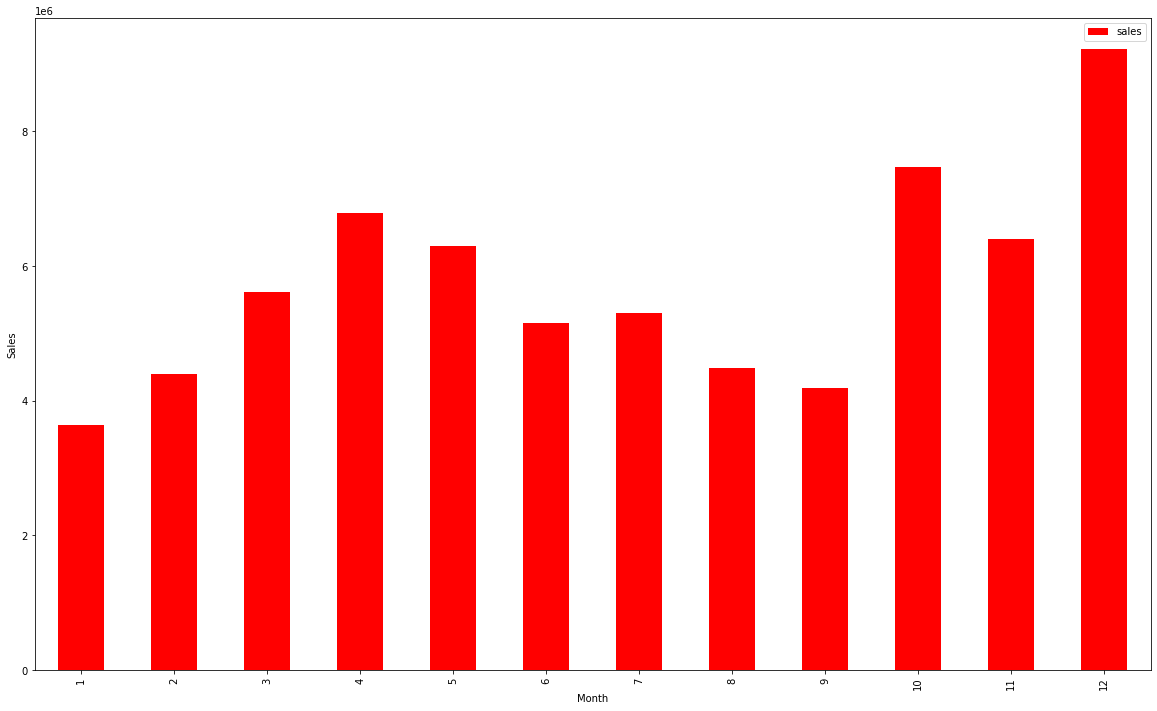

In [65]:
sale.plot.bar(figsize=(20,12), color = 'Red', xlabel = 'Month', ylabel = 'Sales')

### City with maximum order

In [67]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### City field

In [68]:
'682 Chestnut St, Boston, MA 02215'.split(',')

['682 Chestnut St', ' Boston', ' MA 02215']

In [74]:
def city(x):
     return x.split(',')[1]

In [75]:
df['city'] = df['Purchase Address'].apply(city)

In [76]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [78]:
df['city'].unique()

array([' Dallas', ' Boston', ' Los Angeles', ' San Francisco', ' Seattle',
       ' Atlanta', ' New York City', ' Portland', ' Austin'], dtype=object)

In [85]:
ci_df = pd.DataFrame(df.groupby('city')['city'].count())
ci_df


,city
city,
Atlanta,29762
Austin,19810
Boston,39868
Dallas,29640
Los Angeles,59210
New York City,49752
Portland,24930
San Francisco,89464
Seattle,29464


#### Visualization

<AxesSubplot:xlabel='city'>

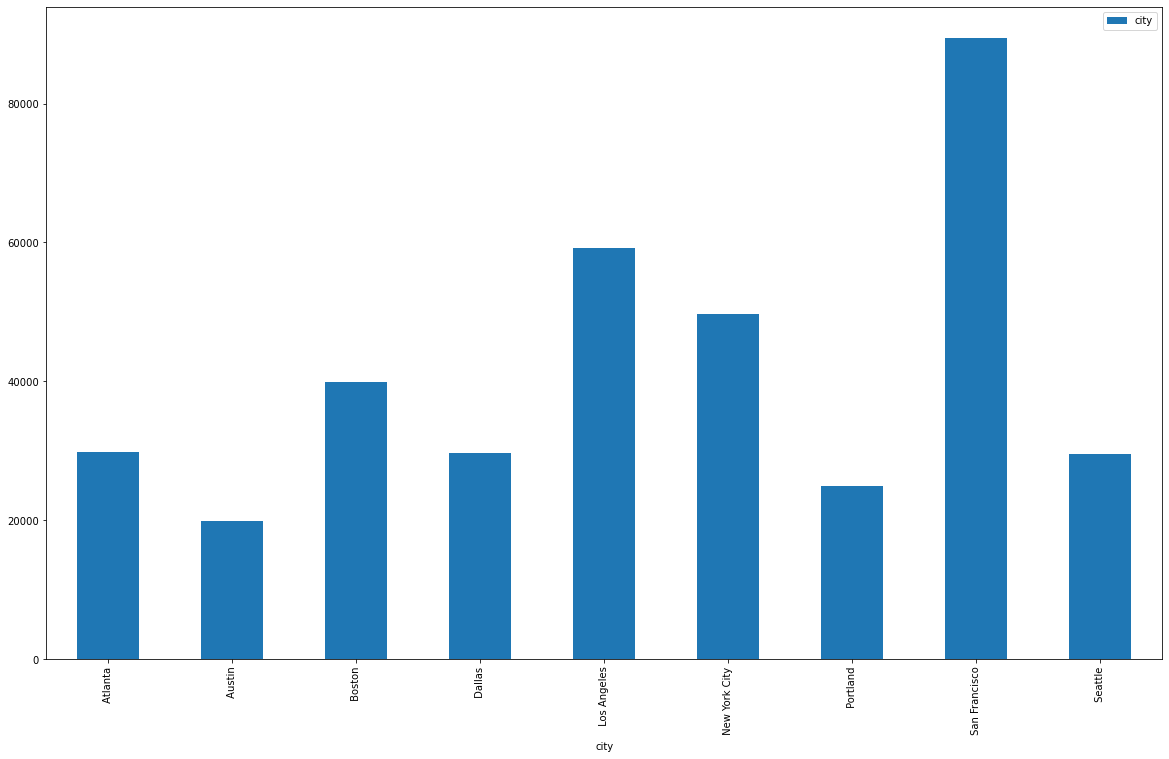

In [86]:
ci_df.plot.bar(figsize=(20,12))